# Synthetic Bandit Plots

Load the bandit model runs and visualize the results

In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from neural_bandits import VariationalBanditEncoder, LMCTS

from config import FIGURES_DIR, BANDIT_DIR

In [2]:
# THIS BLOCK IS NOT MEANT FOR EXECUTION, JUST FOR REFERENCE

# models are saved with following function
""" 
def save_model(args, model, model_name):
    now = datetime.datetime.now()
    filename = model_name + '_' + now.strftime('%d-%b-%Y_Hour-%H-Min-%M')
    model_dir = "./models"
    os.makedirs(model_dir, exist_ok=True)
    final_model_path = os.path.join(model_dir, f"{filename}.ckpt")
    
    # Save model state_dict and metrics
    metrics = {
        'reward': rewards.mean().item(), 
        'regret': regret.mean().item(),
        'elbo': elbo.mean().item(),
        'log_prob': log_prob.mean().item(),
        'entropy': entropy.mean().item(),
        'cumulative_reward': self.cumulative_reward,
        'cumulative_regret': self.cumulative_regret
    }
    torch.save({
        'args': args,
        'model_state_dict': model.state_dict(),
        'metrics': model.metrics,
        'step_times': times,
        'cumulative_reward': model.cumulative_reward,
        'cumulative_regret': model.cumulative_regret
    }, final_model_path)
    
    print(f'Model and metrics saved to {final_model_path}')

"""



' \ndef save_model(args, model, model_name):\n    now = datetime.datetime.now()\n    filename = model_name + \'_\' + now.strftime(\'%d-%b-%Y_Hour-%H-Min-%M\')\n    model_dir = "./models"\n    os.makedirs(model_dir, exist_ok=True)\n    final_model_path = os.path.join(model_dir, f"{filename}.ckpt")\n    \n    # Save model state_dict and metrics\n    metrics = {\n        \'reward\': rewards.mean().item(), \n        \'regret\': regret.mean().item(),\n        \'elbo\': elbo.mean().item(),\n        \'log_prob\': log_prob.mean().item(),\n        \'entropy\': entropy.mean().item(),\n        \'cumulative_reward\': self.cumulative_reward,\n        \'cumulative_regret\': self.cumulative_regret\n    }\n    torch.save({\n        \'args\': args,\n        \'model_state_dict\': model.state_dict(),\n        \'metrics\': model.metrics,\n        \'step_times\': times,\n        \'cumulative_reward\': model.cumulative_reward,\n        \'cumulative_regret\': model.cumulative_regret\n    }, final_model_path)

In [3]:
data_dim = 5
num_bandits = int(1e4) #20000000
data_power = 5
top_m = 1

In [4]:
# load data
data_name = f"bandit_D_{data_dim}_K_{num_bandits}_P={data_power}"
#X, probs = torch.load(f'{data_dir}/{data_name}.pt', weights_only=True)

### Model Loading

In [5]:
# load trained models
num_runs = 5
model_dir = BANDIT_DIR + 'synthetic/models/'
var_post = 'ks'
ks_dict_path = f"numBandits_{num_bandits}_topM_{top_m}_varPost_{var_post}"
ks_dicts = [torch.load(model_dir + ks_dict_path + f'_run_{i}.ckpt', map_location=torch.device('cpu'), weights_only=True) for i in range(num_runs)]

var_post = 'beta'
beta_dict_path = f"numBandits_{num_bandits}_topM_{top_m}_varPost_{var_post}"
beta_dicts = [torch.load(model_dir + beta_dict_path + f'_run_{i}.ckpt', map_location=torch.device('cpu'), weights_only=True) for i in range(num_runs)]

var_post = 'tanh-normal'
tanh_normal_dict_path = f"numBandits_{num_bandits}_topM_{top_m}_varPost_{var_post}"
tanh_normal_dicts = [torch.load(model_dir + tanh_normal_dict_path + f'_run_{i}.ckpt', map_location=torch.device('cpu'), weights_only=True) for i in range(num_runs)]

lmcts_dict_path = f"LMCTS_numBandits_{num_bandits}_topM_{top_m}"
lmcts_dicts = [torch.load(model_dir + lmcts_dict_path + f'_run_{i}.ckpt', map_location=torch.device('cpu'), weights_only=True) for i in range(num_runs)]

In [6]:
lmcts_dict_path, tanh_normal_dict_path

('LMCTS_numBandits_10000_topM_1',
 'numBandits_10000_topM_1_varPost_tanh-normal')

In [7]:
print(ks_dicts[0].keys())
print(beta_dicts[0].keys())
print(tanh_normal_dicts[0].keys())
print(lmcts_dicts[0].keys())

dict_keys(['args', 'model_state_dict', 'metrics', 'step_times', 'cumulative_reward', 'cumulative_regret'])
dict_keys(['args', 'model_state_dict', 'metrics', 'step_times', 'cumulative_reward', 'cumulative_regret'])
dict_keys(['args', 'model_state_dict', 'metrics', 'step_times', 'cumulative_reward', 'cumulative_regret'])
dict_keys(['args', 'model_state_dict', 'metrics', 'step_times', 'cumulative_reward', 'cumulative_regret'])


In [8]:
print(ks_dicts[0]['args'])
print(beta_dicts[0]['args'])
print(tanh_normal_dicts[0]['args'])
print(lmcts_dicts[0]['args'])

{'data_dim': 5, 'data_power': 5, 'num_bandits': 10000, 'var_post': 'ks', 'top_m': 1, 'hidden_layers': [32, 32, 32], 'learning_rate': 0.01, 'entropy_scale': 0.2, 'iterations': 2000, 'seed': 0, 'run': 0}
{'data_dim': 5, 'data_power': 5, 'num_bandits': 10000, 'var_post': 'beta', 'top_m': 1, 'hidden_layers': [32, 32, 32], 'learning_rate': 0.01, 'entropy_scale': 0.1, 'iterations': 2000, 'seed': 0, 'run': 0}
{'data_dim': 5, 'data_power': 5, 'num_bandits': 10000, 'var_post': 'tanh-normal', 'top_m': 1, 'hidden_layers': [32, 32, 32], 'learning_rate': 0.01, 'entropy_estimate_samples': 10, 'iterations': 2000, 'seed': 0, 'run': 0}
{'data_dim': 5, 'data_power': 5, 'num_bandits': 10000, 'top_m': 1, 'hidden_layers': [32, 32, 32], 'learning_rate': 0.0005, 'iterations': 2000, 'inner_num_iters': 50, 'beta_inv': 0.0001, 'seed': 0, 'run': 0}


In [9]:
# load models
models_ks = []
models_beta = []
models_tanh_normal = []
models_lmcts = []

for i in range(num_runs):
    args = ks_dicts[i]['args']
    model_ks = VariationalBanditEncoder(input_dim=args['data_dim'], hidden_layers=args['hidden_layers'], num_bandits=args['num_bandits'], top_m=args['top_m'], var_post=args['var_post'])
    model_ks.load_state_dict(ks_dicts[i]['model_state_dict'])
    model_ks.eval()
    models_ks.append(model_ks)
    
    args = beta_dicts[i]['args']
    model_beta = VariationalBanditEncoder(input_dim=args['data_dim'], hidden_layers=args['hidden_layers'], num_bandits=args['num_bandits'], top_m=args['top_m'], var_post=args['var_post'])
    model_beta.load_state_dict(beta_dicts[i]['model_state_dict'])
    model_beta.eval()
    models_beta.append(model_beta)

    args = tanh_normal_dicts[i]['args']
    model_tanh_normal = VariationalBanditEncoder(input_dim=args['data_dim'], hidden_layers=args['hidden_layers'], num_bandits=args['num_bandits'], top_m=args['top_m'], var_post=args['var_post'])
    model_tanh_normal.load_state_dict(tanh_normal_dicts[i]['model_state_dict'])
    model_tanh_normal.eval()
    models_tanh_normal.append(model_tanh_normal)    

    args = lmcts_dicts[i]['args']
    model_lmcts = LMCTS(input_dim=args['data_dim'], hidden_layers=args['hidden_layers'], num_bandits=args['num_bandits'], top_m=args['top_m'])
    model_lmcts.load_state_dict(lmcts_dicts[i]['model_state_dict'])
    model_lmcts.eval()
    models_lmcts.append(model_lmcts)

### Data/Metric Extraction

In [10]:
ks_step_times_list = [ks_dict['step_times'] for ks_dict in ks_dicts]
beta_step_times_list = [beta_dict['step_times'] for beta_dict in beta_dicts]
tanh_step_times_list = [tanh_normal_dict['step_times'] for tanh_normal_dict in tanh_normal_dicts]
lmcts_step_times_list = [lmcts_dict['step_times'] for lmcts_dict in lmcts_dicts]

ks_times_list = [np.cumsum(step_times) for step_times in ks_step_times_list]
beta_times_list = [np.cumsum(step_times) for step_times in beta_step_times_list]
tanh_times_list = [np.cumsum(step_times) for step_times in tanh_step_times_list]
lmcts_times_list = [np.cumsum(step_times) for step_times in lmcts_step_times_list]

ks_total_times_list = [times[-1] for times in ks_times_list]
beta_total_times_list = [times[-1] for times in beta_times_list]
tanh_total_times_list = [times[-1] for times in tanh_times_list]
lmcts_total_times_list = [times[-1] for times in lmcts_times_list]

In [11]:
ks_total_times_list, beta_total_times_list, tanh_total_times_list, lmcts_total_times_list

([17.656123638153076,
  16.968719005584717,
  17.575416803359985,
  17.605754852294922,
  17.110740661621094],
 [18.08289885520935,
  18.529585361480713,
  18.043328046798706,
  18.774205684661865,
  20.298662662506104],
 [7.362442493438721,
  7.339690685272217,
  6.735463380813599,
  6.762134790420532,
  7.039494514465332],
 [150.05334496498108,
  157.3105320930481,
  142.38117623329163,
  161.61458706855774,
  155.68259739875793])

In [12]:
regret_ks_list = [[dict_['regret'] for dict_ in ks_dicts[i]['metrics']] for i in range(num_runs)]
regret_beta_list = [[dict_['regret'] for dict_ in beta_dicts[i]['metrics']] for i in range(num_runs)]
regret_tanh_list = [[dict_['regret'] for dict_ in tanh_normal_dicts[i]['metrics']] for i in range(num_runs)]
regret_lmcts_list = [[dict_['regret'] for dict_ in lmcts_dicts[i]['metrics']] for i in range(num_runs)]

cumulative_regret_ks_list = [np.cumsum(regret_ks) for regret_ks in regret_ks_list]
cumulative_regret_beta_list = [np.cumsum(regret_beta) for regret_beta in regret_beta_list]
cumulative_regret_tanh_list = [np.cumsum(regret_tanh) for regret_tanh in regret_tanh_list]
cumulative_regret_lmcts_list = [np.cumsum(regret_lmcts) for regret_lmcts in regret_lmcts_list]

reward_ks_list = [[dict_['reward'] for dict_ in ks_dicts[i]['metrics']] for i in range(num_runs)]
reward_beta_list = [[dict_['reward'] for dict_ in beta_dicts[i]['metrics']] for i in range(num_runs)]
reward_tanh_list = [[dict_['reward'] for dict_ in tanh_normal_dicts[i]['metrics']] for i in range(num_runs)]
reward_lmcts_list = [[dict_['reward'] for dict_ in lmcts_dicts[i]['metrics']] for i in range(num_runs)]

cumulative_reward_ks_list = [np.cumsum(reward_ks) for reward_ks in reward_ks_list]
cumulative_reward_beta_list = [np.cumsum(reward_beta) for reward_beta in reward_beta_list]
cumulative_reward_tanh_list = [np.cumsum(reward_tanh) for reward_tanh in reward_tanh_list]
cumulative_reward_lmcts_list = [np.cumsum(reward_lmcts) for reward_lmcts in reward_lmcts_list]

arms_ks_list = [[dict_['arms'] for dict_ in ks_dicts[i]['metrics']] for i in range(num_runs)]
arms_beta_list = [[dict_['arms'] for dict_ in beta_dicts[i]['metrics']] for i in range(num_runs)]
arms_tanh_list = [[dict_['arms'] for dict_ in tanh_normal_dicts[i]['metrics']] for i in range(num_runs)]
#arms_lmcts_list = [[dict_['arms'] for dict_ in lmcts_dicts[i]['metrics']] for i in range(num_runs)]

In [13]:
len(arms_ks_list[0]), len(arms_beta_list[0]), len(arms_tanh_list[0])

(2000, 2000, 2000)

In [14]:
cumulative_reward_beta_list[0].shape, beta_times_list[0].shape, cumulative_regret_lmcts_list[0].shape, len(arms_ks_list[0])

((2000,), (2000,), (2000,), 2000)

In [15]:
# compute mean and standard deviation of cumulative reward and regret

# reward
cumulative_reward_ks_mean = np.mean(cumulative_reward_ks_list, axis=0)
cumulative_reward_ks_std = np.std(cumulative_reward_ks_list, axis=0)

cumulative_reward_beta_mean = np.mean(cumulative_reward_beta_list, axis=0)
cumulative_reward_beta_std = np.std(cumulative_reward_beta_list, axis=0)

cumulative_reward_tanh_mean = np.mean(cumulative_reward_tanh_list, axis=0)
cumulative_reward_tanh_std = np.std(cumulative_reward_tanh_list, axis=0)

cumulative_reward_lmcts_mean = np.mean(cumulative_reward_lmcts_list, axis=0)
cumulative_reward_lmcts_std = np.std(cumulative_reward_lmcts_list, axis=0)

# regret
cumulative_regret_ks_mean = np.mean(cumulative_regret_ks_list, axis=0)
cumulative_regret_ks_std = np.std(cumulative_regret_ks_list, axis=0)

cumulative_regret_beta_mean = np.mean(cumulative_regret_beta_list, axis=0)
cumulative_regret_beta_std = np.std(cumulative_regret_beta_list, axis=0)

cumulative_regret_tanh_mean = np.mean(cumulative_regret_tanh_list, axis=0)
cumulative_regret_tanh_std = np.std(cumulative_regret_tanh_list, axis=0)

cumulative_regret_lmcts_mean = np.mean(cumulative_regret_lmcts_list, axis=0)
cumulative_regret_lmcts_std = np.std(cumulative_regret_lmcts_list, axis=0)

# arms
arms_ks_mean = np.mean(arms_ks_list, axis=0)
arms_ks_std = np.std(arms_ks_list, axis=0)

arms_beta_mean = np.mean(arms_beta_list, axis=0)
arms_beta_std = np.std(arms_beta_list, axis=0)

arms_tanh_mean = np.mean(arms_tanh_list, axis=0)
arms_tanh_std = np.std(arms_tanh_list, axis=0)

#arms_lmcts_mean = np.mean(arms_lmcts_list, axis=0)
#arms_lmcts_std = np.std(arms_lmcts_list, axis=0)



### Plotting

0
1
2
3
4


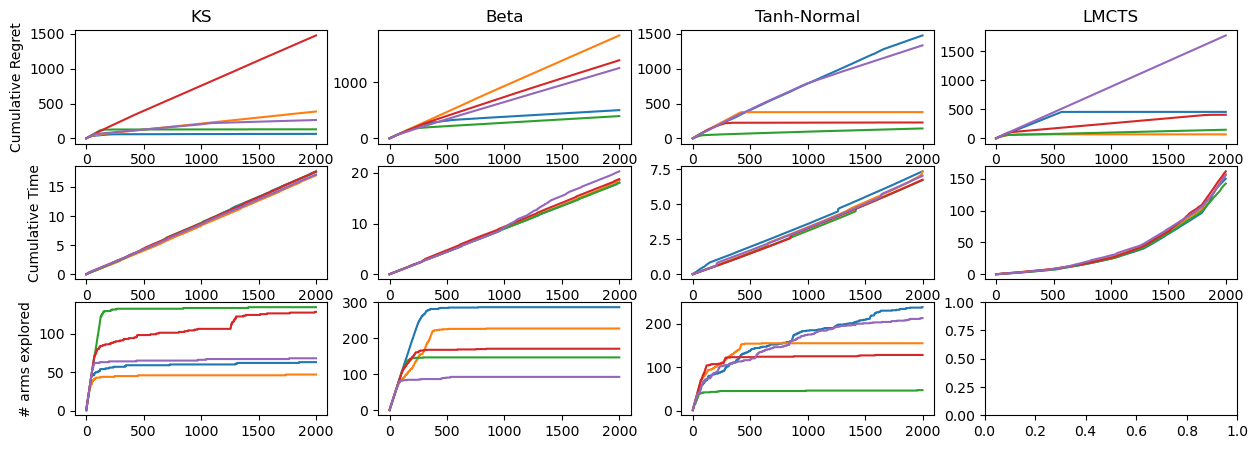

In [16]:
for i, cr in enumerate(cumulative_regret_beta_list):
    print(i)
    #plt.plot(cr)

# a row of 3 subplots, shared y axis
fig, axs = plt.subplots(3, 4, figsize=(15, 5)) #, sharey=True)

# cumulative regret
for i, cr_ks in enumerate(cumulative_regret_ks_list):
    axs[0, 0].plot(cr_ks, label=f'run {i}')

for i, cr_beta in enumerate(cumulative_regret_beta_list):
    axs[0, 1].plot(cr_beta, label=f'run {i}')

for i, cr_tanh in enumerate(cumulative_regret_tanh_list):
    axs[0, 2].plot(cr_tanh, label=f'run {i}')

for i, cr_lmcts in enumerate(cumulative_regret_lmcts_list):
    axs[0, 3].plot(cr_lmcts, label=f'run {i}')

# cumulative time
for i, ct_ks in enumerate(ks_times_list):
    axs[1, 0].plot(ct_ks, label=f'run {i}')

for i, ct_beta in enumerate(beta_times_list):
    axs[1, 1].plot(ct_beta, label=f'run {i}')

for i, ct_tanh in enumerate(tanh_times_list):
    axs[1, 2].plot(ct_tanh, label=f'run {i}')

for i, ct_lmcts in enumerate(lmcts_times_list):
    axs[1, 3].plot(ct_lmcts, label=f'run {i}')

# number of arms explored
for i, arms_ks in enumerate(arms_ks_list):
    axs[2, 0].plot(arms_ks, label=f'run {i}')

for i, arms_beta in enumerate(arms_beta_list):
    axs[2, 1].plot(arms_beta, label=f'run {i}')

for i, arms_tanh in enumerate(arms_tanh_list):
    axs[2, 2].plot(arms_tanh, label=f'run {i}')

#for i, arms_lmcts in enumerate(arms_lmcts_list):
#    axs[2, 2].plot(arms_lmcts, label=f'run {i}')

# set y label
axs[0, 0].set_ylabel('Cumulative Regret')
axs[1, 0].set_ylabel('Cumulative Time')
axs[2, 0].set_ylabel('# arms explored')

axs[0, 0].set_title('KS')
axs[0, 1].set_title('Beta')
axs[0, 2].set_title('Tanh-Normal')
axs[0, 3].set_title('LMCTS')

plt.show()


In [17]:
cumulative_regret_ks_mean[-1], cumulative_regret_beta_mean[-1], cumulative_regret_lmcts_mean[-1]

(465.2016511797905, 1075.7444652915, 569.0535897254944)

### Paper Plot

In [18]:
ticklabel_pad = 0
title_pad = -100 # not q
xlabel_pad = -12

title_fontsize = 10
label_fontsize = 9
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['tab:orange', 'tab:blue', 'tab:green'])


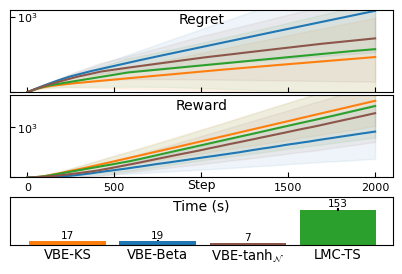

In [19]:
# Adjust the figure size to be small for paper
fig = plt.figure(figsize=(4.5, 2.75))

colormap = {r'VBE-KS': 'tab:orange', r'VBE-Beta': 'tab:blue', r'LMC-TS': 'tab:green', r'VBE-$\tanh_{\mathcal{N}}$': 'tab:brown'}

alpha = 0.075
xlabel_pad = -10

# Define heights for each subplot
ax1_height = 0.3  # Height of ax1 (Regret plot)
ax2_height = 0.3  # Height of ax2 (Reward plot)
ax3_height = 0.175  # Height of ax3 (Time plot)

# Define vertical spacings
ax1_ax2_vert_spacing = 0.01  # Vertical space between ax1 and ax2
ax2_ax3_vert_spacing = 0.07  # Vertical space between ax2 and ax3

# Calculate positions
ax1_bottom = 0.1 + ax3_height + ax2_ax3_vert_spacing + ax2_height + ax1_ax2_vert_spacing  # Bottom of ax1
ax2_bottom = 0.1 + ax3_height + ax2_ax3_vert_spacing  # Bottom of ax2
ax3_bottom = 0.1  # Bottom of ax3

# Create subplots with manual spacing
ax1 = fig.add_axes([0.1, ax1_bottom, 0.85, ax1_height])  # Top plot (Regret)
ax2 = fig.add_axes([0.1, ax2_bottom, 0.85, ax2_height])  # Middle plot (Reward)
ax3 = fig.add_axes([0.1, ax3_bottom, 0.85, ax3_height])  # Bottom plot (Time)

# Set tick direction to 'in' and adjust tick label positions
ax1.tick_params(axis='y', direction='in', labelsize=8, pad=-20)  # Move major y-tick labels inside
ax2.tick_params(axis='y', direction='in', labelsize=8, pad=-20)  # Move major y-tick labels inside
ax3.tick_params(axis='y', direction='in', labelsize=8, pad=-20)  # Move major y-tick labels inside

ax1.tick_params(axis='x', direction='in', labelsize=8, pad=5)
ax2.tick_params(axis='x', direction='in', labelsize=8, pad=5)
ax3.tick_params(axis='x', direction='in', labelsize=8, pad=5)

# Also adjust the minor ticks
y_tick_label_pad = -10
ax1.tick_params(axis='y', which='minor', direction='in', labelsize=8, pad=y_tick_label_pad)
ax2.tick_params(axis='y', which='minor', direction='in', labelsize=8, pad=y_tick_label_pad)
ax3.tick_params(axis='y', which='minor', direction='in', labelsize=8, pad=y_tick_label_pad)

# Regret plot (ax1)
ax1.plot(cumulative_regret_ks_mean, label=r'VBE-KS', color=colormap['VBE-KS'])
ax1.fill_between(range(len(cumulative_regret_ks_mean)),
                 cumulative_regret_ks_mean - cumulative_regret_ks_std, 
                 cumulative_regret_ks_mean + cumulative_regret_ks_std, alpha=alpha, color=colormap['VBE-KS'])
ax1.plot(cumulative_regret_beta_mean, label=r'VBE-Beta', color=colormap['VBE-Beta'])
ax1.fill_between(range(len(cumulative_regret_beta_mean)), 
                 cumulative_regret_beta_mean - cumulative_regret_beta_std, 
                 cumulative_regret_beta_mean + cumulative_regret_beta_std, alpha=alpha, color=colormap['VBE-Beta'])
ax1.plot(cumulative_regret_lmcts_mean, label=r'LMC-TS', color=colormap['LMC-TS'])
ax1.fill_between(range(len(cumulative_regret_lmcts_mean)), 
                 cumulative_regret_lmcts_mean - cumulative_regret_lmcts_std, 
                 cumulative_regret_lmcts_mean + cumulative_regret_lmcts_std, alpha=alpha, color=colormap['LMC-TS'])
ax1.plot(cumulative_regret_tanh_mean, label=r'VBE-$\tanh_{\mathcal{N}}$', color=colormap[r'VBE-$\tanh_{\mathcal{N}}$'])
ax1.fill_between(range(len(cumulative_regret_tanh_mean)),
                 cumulative_regret_tanh_mean - cumulative_regret_tanh_std,
                 cumulative_regret_tanh_mean + cumulative_regret_tanh_std, alpha=alpha, color=colormap[r'VBE-$\tanh_{\mathcal{N}}$'])
ax1.set_title('Regret', fontsize=title_fontsize, y=0.725)
ax1.set_xticks([0, 500, 1000, 1500, 2000])
ax1.set_xticklabels([])  # No x-tick labels on the top plot
ax1.set_yticks([0, 1000])
ax1.set_yticklabels(['', r'$10^3$'])

# Reward plot (ax2)
ax2.plot(cumulative_reward_ks_mean, label=r'VBE-KS', color=colormap['VBE-KS'])
ax2.fill_between(range(len(cumulative_reward_ks_mean)), 
                 cumulative_reward_ks_mean - cumulative_reward_ks_std, 
                 cumulative_reward_ks_mean + cumulative_reward_ks_std, alpha=alpha, color=colormap['VBE-KS'])
ax2.plot(cumulative_reward_beta_mean, label=r'VBE-Beta', color=colormap['VBE-Beta'])
ax2.fill_between(range(len(cumulative_reward_beta_mean)),
                 cumulative_reward_beta_mean - cumulative_reward_beta_std, 
                 cumulative_reward_beta_mean + cumulative_reward_beta_std, alpha=alpha, color=colormap['VBE-Beta'])
ax2.plot(cumulative_reward_lmcts_mean, label=r'LMC-TS', color=colormap['LMC-TS'])
ax2.fill_between(range(len(cumulative_reward_lmcts_mean)), 
                 cumulative_reward_lmcts_mean - cumulative_reward_lmcts_std, 
                 cumulative_reward_lmcts_mean + cumulative_reward_lmcts_std, alpha=alpha, color=colormap['LMC-TS']) 
ax2.plot(cumulative_reward_tanh_mean, label=r'VBE-$\tanh_{\mathcal{N}}$', color=colormap[r'VBE-$\tanh_{\mathcal{N}}$'])
ax2.fill_between(range(len(cumulative_reward_tanh_mean)), 
                 cumulative_reward_tanh_mean - cumulative_reward_tanh_std, 
                 cumulative_reward_tanh_mean + cumulative_reward_tanh_std, alpha=alpha, color=colormap[r'VBE-$\tanh_{\mathcal{N}}$'])
ax2.set_title('Reward', fontsize=title_fontsize, y=0.725)
ax2.set_xlabel('Step', labelpad=xlabel_pad, fontsize=label_fontsize)
ax2.set_xticks([0, 500, 1000, 1500, 2000])
ax2.set_xticklabels(['0', '500', '', '1500', '2000'])
ax2.set_yticks([0, 1000])
ax2.set_yticklabels(['', r'$10^3$'])

# Shift the x-tick labels of ax2 upward toward the x-axis
labels = ax2.get_xticklabels()
for label in labels:
    label.set_y(.02)  # Adjust this value as needed to fine-tune the position
ax2.set_xticklabels(labels)

# Time plot (ax3)
left_start = 1.3   # Left edge of the leftmost bar
right_end = 3.115   # Right edge of the rightmost bar
width = 0.4        # Width of each bar
num_bars = 4       # Number of bars

# Calculate the total available space for gaps between the bars
total_space = (right_end - left_start) - num_bars * width
spacing = total_space / (num_bars - 1)

# Define the positions of the left edges of the bars
bar_positions = [left_start + i * (width + spacing) for i in range(num_bars)]
#bar_positions = [1.4, 1.75, 2.2, 2.7]
labels = [r'VBE-KS', r'VBE-Beta', r'VBE-$\tanh_{\mathcal{N}}$', r'LMC-TS']
colors = [colormap[k] for k in labels]
bars = ax3.bar(bar_positions, 
               [np.mean(ks_total_times_list), np.mean(beta_total_times_list), np.mean(tanh_total_times_list), np.mean(lmcts_total_times_list)], 
               yerr=[np.std(ks_total_times_list), np.std(beta_total_times_list), np.std(tanh_total_times_list), np.std(lmcts_total_times_list)], 
               width=width, 
               label=labels,
               color=colors)
if False: # for log scaling of bar plot
    ax3.set_yscale('log')
    ax3.set_ylim(5, 550)
    ax3.set_yticks([10, 100])
    ax3.set_yticklabels([r'$10$', r'$10^2$'])
else: # for linear scaling
    # remove all yticks and yticklabels
    ax3.set_yticks([])
    ax3.set_yticklabels([])
    ax3.set_ylim(0, 210)
    ax3.set_xlim(1, 3)


ax1.set_ylim(0, 1090) # regret
ax2.set_ylim(0, 1650) # reward

ax3.set_title('Time (s)', fontsize=title_fontsize, y=0.55)

ax3.set_xticks(bar_positions)
ax3.set_xticklabels([r'VBE-KS', r'VBE-Beta', r'VBE-$\tanh_{\mathcal{N}}$', r'LMC-TS'], fontsize=9.5)
ax3.tick_params(axis='x', pad=1.75)
ax3.tick_params(axis='x', which='both', length=.01, width=.01) # remove x-ticks

# Place text on top of the bars indicating the mean values
for bar, mean_value in zip(bars, [np.mean(ks_total_times_list), np.mean(beta_total_times_list), np.mean(tanh_total_times_list), np.mean(lmcts_total_times_list)]):
    ax3.text(
        bar.get_x() + bar.get_width() / 2,  # X position at the center of the bar
        bar.get_height() + bar.get_height()*.02,  # Y position at the top of the bar
        f'{mean_value:.0f}',  # Text to display (mean value rounded to 2 decimal places)
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=7.5  # Font size for the text
    )


#plt.savefig(FIGURES_DIR + f'bandits_regret_reward_time_topM_{top_m}_mean.png', bbox_inches='tight', pad_inches=0.005, dpi=200)
plt.show()

### Poster version

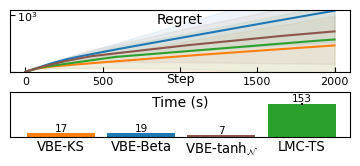

In [20]:
# Adjust the figure size for the paper
fig = plt.figure(figsize=(4, 2))

colormap = {r'VBE-KS': 'tab:orange', r'VBE-Beta': 'tab:blue', r'LMC-TS': 'tab:green', r'VBE-$\tanh_{\mathcal{N}}$': 'tab:brown'}

alpha = 0.075
xlabel_pad = -10

# Define heights for each subplot
ax1_height = 0.31  # Height of ax1 (Regret plot)
ax3_height = 0.225  # Height of ax3 (Time plot)

# Define vertical spacings
ax1_ax3_vert_spacing = 0.1  # Vertical space between ax1 and ax3

# Calculate positions
ax1_bottom = 0.1 + ax3_height + ax1_ax3_vert_spacing  # Bottom of ax1
ax3_bottom = 0.1  # Bottom of ax3

# Create subplots with manual spacing
ax1 = fig.add_axes([0.1, ax1_bottom, 0.85, ax1_height])  # Top plot (Regret)
ax3 = fig.add_axes([0.1, ax3_bottom, 0.85, ax3_height])  # Bottom plot (Time)

# Set tick direction to 'in' and adjust tick label positions
ax1.tick_params(axis='y', direction='in', labelsize=8, pad=-20)  # Move major y-tick labels inside
ax3.tick_params(axis='y', direction='in', labelsize=8, pad=-20)  # Move major y-tick labels inside
ax1.tick_params(axis='x', direction='in', labelsize=8, pad=5)
ax3.tick_params(axis='x', direction='in', labelsize=8, pad=5)

# Also adjust the minor ticks
y_tick_label_pad = -10
ax1.tick_params(axis='y', which='minor', direction='in', labelsize=8, pad=y_tick_label_pad)
ax3.tick_params(axis='y', which='minor', direction='in', labelsize=8, pad=y_tick_label_pad)

# Regret plot (ax1)
ax1.plot(cumulative_regret_ks_mean, label=r'VBE-KS', color=colormap['VBE-KS'])
ax1.fill_between(range(len(cumulative_regret_ks_mean)),
                 cumulative_regret_ks_mean - cumulative_regret_ks_std, 
                 cumulative_regret_ks_mean + cumulative_regret_ks_std, alpha=alpha, color=colormap['VBE-KS'])
ax1.plot(cumulative_regret_beta_mean, label=r'VBE-Beta', color=colormap['VBE-Beta'])
ax1.fill_between(range(len(cumulative_regret_beta_mean)), 
                 cumulative_regret_beta_mean - cumulative_regret_beta_std, 
                 cumulative_regret_beta_mean + cumulative_regret_beta_std, alpha=alpha, color=colormap['VBE-Beta'])
ax1.plot(cumulative_regret_lmcts_mean, label=r'LMC-TS', color=colormap['LMC-TS'])
ax1.fill_between(range(len(cumulative_regret_lmcts_mean)), 
                 cumulative_regret_lmcts_mean - cumulative_regret_lmcts_std, 
                 cumulative_regret_lmcts_mean + cumulative_regret_lmcts_std, alpha=alpha, color=colormap['LMC-TS'])
ax1.plot(cumulative_regret_tanh_mean, label=r'VBE-$\tanh_{\mathcal{N}}$', color=colormap[r'VBE-$\tanh_{\mathcal{N}}$'])
ax1.fill_between(range(len(cumulative_regret_tanh_mean)),
                 cumulative_regret_tanh_mean - cumulative_regret_tanh_std,
                 cumulative_regret_tanh_mean + cumulative_regret_tanh_std, alpha=alpha, color=colormap[r'VBE-$\tanh_{\mathcal{N}}$'])
ax1.set_title('Regret', fontsize=10, y=0.65)
ax1.set_xlabel('Step', labelpad=xlabel_pad, fontsize=label_fontsize)
ax1.set_xticks([0, 500, 1000, 1500, 2000])


#ax1.set_xticklabels(['0', '500', '', '1500', '2000'])
ax1.tick_params(axis='x', pad=3)  # Adjust pad to a smaller value to move labels closer
ax1.set_xticklabels(['0', '500', '', '1500', '2000'])
ax1.set_yticks([0, 1000])
ax1.set_yticklabels(['', r'$10^3$'])
ax1.set_ylim(0, 1090)  # Regret

# Time plot (ax3)
left_start = 1.3   # Left edge of the leftmost bar
right_end = 3.115   # Right edge of the rightmost bar
width = 0.4        # Width of each bar
num_bars = 4       # Number of bars

# Calculate the total available space for gaps between the bars
total_space = (right_end - left_start) - num_bars * width
spacing = total_space / (num_bars - 1)

# Define the positions of the left edges of the bars
bar_positions = [left_start + i * (width + spacing) for i in range(num_bars)]
labels = [r'VBE-KS', r'VBE-Beta', r'VBE-$\tanh_{\mathcal{N}}$', r'LMC-TS']
colors = [colormap[k] for k in labels]
bars = ax3.bar(bar_positions, 
               [np.mean(ks_total_times_list), np.mean(beta_total_times_list), np.mean(tanh_total_times_list), np.mean(lmcts_total_times_list)], 
               yerr=[np.std(ks_total_times_list), np.std(beta_total_times_list), np.std(tanh_total_times_list), np.std(lmcts_total_times_list)], 
               width=width, 
               label=labels,
               color=colors)

# Set y-scale and limits for time plot
if False:  # For log scaling of bar plot
    ax3.set_yscale('log')
    ax3.set_ylim(5, 550)
    ax3.set_yticks([10, 100])
    ax3.set_yticklabels([r'$10$', r'$10^2$'])
else:  # For linear scaling
    ax3.set_yticks([])
    ax3.set_ylim(0, 210)
    ax3.set_xlim(1, 3)

# Add mean value text on top of bars
for bar, mean_value in zip(bars, [np.mean(ks_total_times_list), np.mean(beta_total_times_list), np.mean(tanh_total_times_list), np.mean(lmcts_total_times_list)]):
    ax3.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + bar.get_height() * 0.02,
        f'{mean_value:.0f}',
        ha='center',
        va='bottom',
        fontsize=7.5
    )

ax3.set_title('Time (s)', fontsize=10, y=0.5)
ax3.set_xticks(bar_positions)
ax3.set_xticklabels([r'VBE-KS', r'VBE-Beta', r'VBE-$\tanh_{\mathcal{N}}$', r'LMC-TS'], fontsize=9.5)
ax3.tick_params(axis='x', pad=1.75)
ax3.tick_params(axis='x', which='both', length=0.01, width=0.01)  # Remove x-ticks

# Display the plot
#plt.savefig(FIGURES_DIR + f'bandits_regret_reward_time_poster.png', bbox_inches='tight', pad_inches=0.005, dpi=300)
plt.show()
